Text(0, 0.5, 'Score')

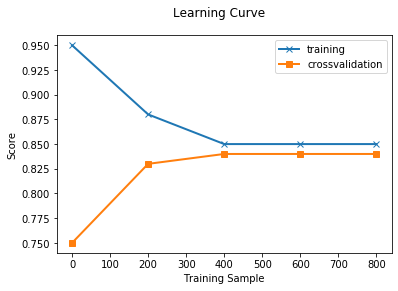

In [4]:
# Example 01: Simple Learning Curve
import matplotlib.pyplot as plt
import numpy as np

traingscore= [0.95,0.88,0.85,0.85,0.85]
testingscore = [0.75,0.83,0.84,0.84,0.84]

plt.figure()
plt.plot(range(0,1000,200),traingscore,marker ='x',linewidth=2,label='training')
plt.plot(range(0,1000,200),testingscore,marker ='s',linewidth=2,label='crossvalidation')
leg = plt.legend();

plt.suptitle('Learning Curve')
plt.xlabel('Training Sample')
plt.ylabel('Score')

### Draw Leanring Curve using SK Learn

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


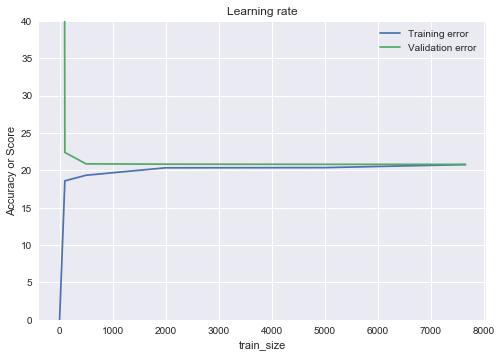

In [13]:
# Example 2:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

electricity  = pd.read_csv("Folds5x2_pp.csv")

training_Size = [1,100,500,2000,5000,7654]

features = ['AT','V','AP','RH']

target = 'PE'

train_size,train_scores,validation_scores = learning_curve(estimator=LinearRegression(),
                                                           X = electricity[features],
                                                           y = electricity[target],
                                                           train_sizes= training_Size,
                                                           cv =5,
                                                           scoring='neg_mean_squared_error')

train_score_mean = - (train_scores.mean(axis = 1))

validation_score_mean = - (validation_scores.mean(axis =1 ))

plt.style.use('seaborn')
plt.title("Learning rate")
plt.plot(train_size, train_score_mean, label = 'Training error')
plt.plot(train_size, validation_score_mean, label = 'Validation error')
plt.xlabel("train_size")
plt.ylabel("Accuracy or Score")
plt.legend()

plt.ylim(0,40)

electricity.head(5)

### Plot Learning Curve for 'naive_bayes' and 'svm'

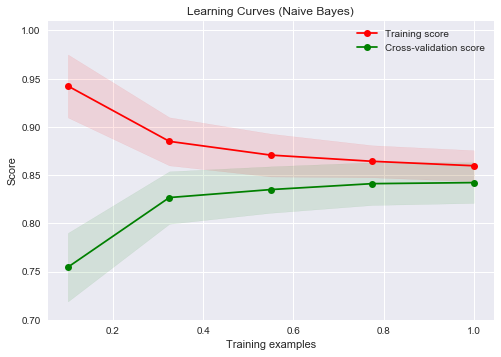

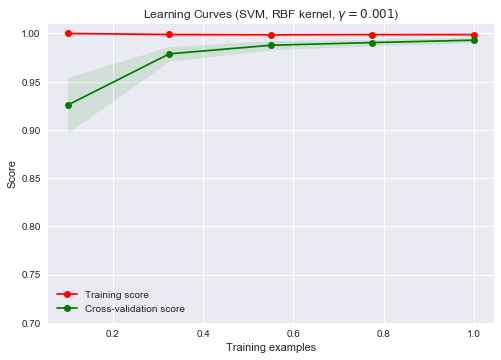

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_Curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes = np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    test_size,train_score,test_score = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_score,axis =1)
    train_scores_std = np.std(train_score,axis =1)
    test_scores_mean = np.mean(test_score,axis =1)
    test_scores_std = np.std(test_score,axis =1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.grid()

    plt.legend(loc="best")
    return plt

digits = load_digits()

X,y = digits.data,digits.target

# ------------Plot Learning Curve using (Naive Bayes)

title =  "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()

plot_learning_Curve(estimator,title,X,y,ylim =(0.7,1.01),cv=cv,n_jobs=4)

# ------------Plot Learning Curve Using(SVM)
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_Curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()